# Difference Aanalysis

Here I am going to present the result for difference analysis. Since we do not have good results based on PCA. There is an idea to check the status of the PWP gorup for finding out what is the effect of parkinson treamtment on them. For this purpose I am going to distinguish the data for patinets. Obsever the effect of daily recorded information for them before and after treamtent to come up with the explanasion on the treatment effect.

In [20]:
# Import pandas for using Data Frames
import pandas as pd
# Import os for working with the files.
import os
# Import numpy for working with the arrays
import numpy as np
# Import date time to convert timestamp to the datetime object
from datetime import datetime
# Using matplotlib for visualizatoin
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

Now lets read the extracted feature file into a dataframe

In [2]:
# TODO Read the data.
# Set the file path
features_file_path = os.path.join(os.getcwd(),"voice_feature_extraction.csv")
# Read the file into a DataFrame
features_df = pd.read_csv(features_file_path)

# Keep tracking of the rows that needed to be removed
labels = []
for index,row in features_df.iterrows():
    if row['medTimepoint'] == "I don't take Parkinson medications":
        features_df.at[index,'medTimepoint'] = 0
    elif row['medTimepoint'] == "Immediately before Parkinson medication":
        features_df.at[index,'medTimepoint'] = 1
    elif row['medTimepoint'] == "Just after Parkinson medication (at your best)":
        features_df.at[index,'medTimepoint'] = 2
    elif row['medTimepoint'] == "Another time":
        features_df.at[index,'medTimepoint'] = 3
    else:
        labels.append(index)
    features_df.at[index,'createdOn'] = datetime.fromtimestamp(row['createdOn']/1000.0)
# Drop all the rows that are not properly annotated
features_df = features_df.drop(labels=labels, axis=0)
# Display the pulished Data frame
display(features_df)



,healthCode,audio_audio,medTimepoint,createdOn
0,e518e2ad-5a48-41a7-8143-2997cb32b678,5836266,0,2015-06-22 23:35:05
1,e518e2ad-5a48-41a7-8143-2997cb32b678,5836313,0,2015-06-22 23:55:42
2,e518e2ad-5a48-41a7-8143-2997cb32b678,5832089,0,2015-06-22 23:56:08
3,e5bb566a-9f26-496f-89be-f940162a536c,5837127,1,2015-04-18 10:53:04
4,e5bb566a-9f26-496f-89be-f940162a536c,5831572,2,2015-04-18 13:05:22
...,...,...,...,...
2360,ffab2631-dfe1-4f5e-bd9e-f763e8aede19,5538484,1,2015-07-15 07:09:09
2361,ffab2631-dfe1-4f5e-bd9e-f763e8aede19,5545712,2,2015-07-16 07:06:02
2362,ffe9fec0-e3c6-44b2-8b4f-8f6f772b99c3,5910424,1,2015-04-24 05:11:13
2363,ffe9fec0-e3c6-44b2-8b4f-8f6f772b99c3,5925740,1,2015-04-26 17:57:27


Lets separate the for the healthCode and remove the duplications

In [3]:
# After Medication
healthCode_pd = pd.DataFrame(features_df['healthCode']).drop_duplicates()
display(healthCode_pd)

,healthCode
0,e518e2ad-5a48-41a7-8143-2997cb32b678
3,e5bb566a-9f26-496f-89be-f940162a536c
16,e64e4bd3-0209-4f60-a6bf-8132239090bd
25,e67c8b17-09c4-40d6-92db-efbcd58d155e
32,e697c56e-1b27-4d60-a346-8d8407c1601c
...,...
2213,ff47510c-140c-45de-ba42-19a227007b33
2214,ff699dbc-26d4-4dae-8c34-d0fb7b96ae21
2219,ff776fbd-45ad-491b-ba6d-67a74f62c434
2220,ffab2631-dfe1-4f5e-bd9e-f763e8aede19


Lets suft the list based on the `healthcode` to find out the time differences. 

In [4]:
# Record all the healthCode that user recorded the information in differnt times 
active_healthCode_list = []
for index, row in healthCode_pd.iterrows():
    temp_pf = features_df[features_df['healthCode'] == row['healthCode']]
    
    temp_day = temp_label = -1
    for index1, row1 in temp_pf.iterrows():
        if temp_day == -1 and temp_label == -1:
            # Set the temp day and temp label to the first record
            temp_day = row1['createdOn'].day
            temp_label = int(row1['medTimepoint'])
            continue
        if row1['createdOn'].day == temp_day:
            # Check the labels
            if temp_label != row1['medTimepoint']:
                # Add the healthCode to the list
                active_healthCode_list.append(row['healthCode'])
                # break the loop
                break
            else:
                # Change the temperaray records and start again
                temp_day = row1['createdOn'].day
                temp_label = int(row1['medTimepoint'])
                continue

print (f'From the all available {len(healthCode_pd)} healtCode. we can use only {len(active_healthCode_list)} of them.')
display(features_df)

From the all available 68 healtCode. we can use only 14 of them.


,healthCode,audio_audio,medTimepoint,createdOn
0,e518e2ad-5a48-41a7-8143-2997cb32b678,5836266,0,2015-06-22 23:35:05
1,e518e2ad-5a48-41a7-8143-2997cb32b678,5836313,0,2015-06-22 23:55:42
2,e518e2ad-5a48-41a7-8143-2997cb32b678,5832089,0,2015-06-22 23:56:08
3,e5bb566a-9f26-496f-89be-f940162a536c,5837127,1,2015-04-18 10:53:04
4,e5bb566a-9f26-496f-89be-f940162a536c,5831572,2,2015-04-18 13:05:22
...,...,...,...,...
2360,ffab2631-dfe1-4f5e-bd9e-f763e8aede19,5538484,1,2015-07-15 07:09:09
2361,ffab2631-dfe1-4f5e-bd9e-f763e8aede19,5545712,2,2015-07-16 07:06:02
2362,ffe9fec0-e3c6-44b2-8b4f-8f6f772b99c3,5910424,1,2015-04-24 05:11:13
2363,ffe9fec0-e3c6-44b2-8b4f-8f6f772b99c3,5925740,1,2015-04-26 17:57:27


Lets now work on the limited healthCodes. But I am going to apply a limitation. I am looking for the records that the first label is `1` and the second is `2`:

In [5]:
record_list = []
for healthCode in active_healthCode_list:
    # Filter the data to the specific healthCode
    temp_pf = features_df[features_df['healthCode'] == healthCode]
    temp_day = temp_label = -1
    temp_record = None
    
    for index, row in temp_pf.iterrows():
        if temp_day == -1 and temp_label == -1:
            # Set the temp day and temp label to the first record
            temp_day = row['createdOn'].day
            temp_label = int(row['medTimepoint'])
            temp_record = row
            # Continue to the next record
            continue

        # Check the records belong to the same day
        if row['createdOn'].day == temp_day:
            # If yes check if the label is one or two
            if (temp_label == 1 and row['medTimepoint']==2) or (temp_label == 2 and row['medTimepoint']==1):
                #Record both iterms as valid
                record_list.append(temp_record)
                record_list.append(row)
                # Reset the temp records
                temp_day = temp_label = -1
                temp_record = None
                # Continue to the next record            
                continue
            else:
                # Update the temp recordsR
                temp_day = row['createdOn'].day
                temp_label = int(row['medTimepoint'])
                temp_record = row
                # Continue to the next record            
                continue

Lets create a Pandas DataFrame based no this:

In [6]:
pwp_pd = pd.DataFrame(data=record_list, columns=['healthCode',
                                                 'audio_audio',
                                                 'medTimepoint',
                                                 'createdOn'])
display(pwp_pd)

,healthCode,audio_audio,medTimepoint,createdOn
3,e5bb566a-9f26-496f-89be-f940162a536c,5837127,1,2015-04-18 10:53:04
4,e5bb566a-9f26-496f-89be-f940162a536c,5831572,2,2015-04-18 13:05:22
32,e697c56e-1b27-4d60-a346-8d8407c1601c,5925353,2,2015-03-16 08:30:51
33,e697c56e-1b27-4d60-a346-8d8407c1601c,5905670,1,2015-03-16 18:02:13
1204,ec5dd8db-c41e-4879-8bfb-c26eacc64f42,5914840,2,2015-04-25 13:46:43
1205,ec5dd8db-c41e-4879-8bfb-c26eacc64f42,5913778,1,2015-04-25 18:33:49
1211,ec822b07-4b4b-4117-9f7d-7e92e0fee1d3,5832798,2,2015-06-22 09:05:59
1212,ec822b07-4b4b-4117-9f7d-7e92e0fee1d3,5832695,1,2015-06-22 16:36:33
1296,edfab0c7-6bd1-424e-b459-6417c5a726fe,5450886,2,2015-03-10 11:13:08
1297,edfab0c7-6bd1-424e-b459-6417c5a726fe,5412990,1,2015-03-10 19:32:43


We also need at least equvalent number of records from people in HC group to start our analysis. Lets extract that group of information as well.

In [7]:
# Surf over the healthCodes try to separate the ones with no parkinson diagnoised
healthy_healthCode_list = []
for index, row in healthCode_pd.iterrows():
    temp_pf = features_df[features_df['healthCode'] == row['healthCode']]
    temp_day = temp_label = -1
    for index1, row1 in temp_pf.iterrows():
        if temp_day == -1 and temp_label == -1:
            # Set the temp day and temp label to the first record
            temp_day = row1['createdOn'].day
            temp_label = int(row1['medTimepoint'])
            continue
        if row1['createdOn'].day == temp_day:
            # Check the labels
            if (temp_label == row1['medTimepoint']) and (row1['medTimepoint']==0):
                # Add the healthCode to the list
                healthy_healthCode_list.append(row['healthCode'])
                # break the loop
                break
            else:
                # Change the temperaray records and start again
                temp_day = row1['createdOn'].day
                temp_label = int(row1['medTimepoint'])
                continue

print (f'From the all available {len(healthCode_pd)} healtCode. we can use only {len(healthy_healthCode_list)} of them as HC group who grecorded their information more than one in a day.')


From the all available 68 healtCode. we can use only 26 of them as HC group who grecorded their information more than one in a day.


Lets generate a Pandas Data frame based on the information.  

In [8]:
record_list = []
for healthCode in healthy_healthCode_list:
    # Filter the data to the specific healthCode
    temp_pf = features_df[features_df['healthCode'] == healthCode]
    temp_day = temp_label = -1
    temp_record = None
    
    for index, row in temp_pf.iterrows():
        if temp_day == -1 and temp_label == -1:
            # Set the temp day and temp label to the first record
            temp_day = row['createdOn'].day
            temp_label = int(row['medTimepoint'])
            temp_record = row
            # Continue to the next record
            continue

        # Check the records belong to the same day
        if row['createdOn'].day == temp_day:
            # If yes check if the label is one or two
            if (temp_label == row['medTimepoint']) and (row['medTimepoint']==0):
                #Record both iterms as valid
                record_list.append(temp_record)
                record_list.append(row)
                # Reset the temp records
                temp_day = temp_label = -1
                temp_record = None
                # Continue to the next record            
                continue
            else:
                # Update the temp recordsR
                temp_day = row['createdOn'].day
                temp_label = int(row['medTimepoint'])
                temp_record = row
                # Continue to the next record            
                continue
                
# Convert the records to data frame
hc_pd = pd.DataFrame(data=record_list, columns=['healthCode',
                                                 'audio_audio',
                                                 'medTimepoint',
                                                 'createdOn'])
display(hc_pd)

,healthCode,audio_audio,medTimepoint,createdOn
0,e518e2ad-5a48-41a7-8143-2997cb32b678,5836266,0,2015-06-22 23:35:05
1,e518e2ad-5a48-41a7-8143-2997cb32b678,5836313,0,2015-06-22 23:55:42
16,e64e4bd3-0209-4f60-a6bf-8132239090bd,5638293,0,2015-07-28 17:31:07
17,e64e4bd3-0209-4f60-a6bf-8132239090bd,5636947,0,2015-07-28 17:31:40
395,e7f0d9ca-682d-4da8-95c6-3b8ffdca0a03,5594023,0,2015-05-10 21:36:12
...,...,...,...,...
2209,fe85bf26-dac6-4bda-af45-d89631306e83,5668659,0,2015-05-20 11:02:53
2214,ff699dbc-26d4-4dae-8c34-d0fb7b96ae21,5502922,0,2015-05-06 01:29:06
2215,ff699dbc-26d4-4dae-8c34-d0fb7b96ae21,5512874,0,2015-05-06 23:20:58
2216,ff699dbc-26d4-4dae-8c34-d0fb7b96ae21,5565168,0,2015-05-08 20:39:08


# Difference Analysis

We are going to have two different approach on analysis our extracted data. 

First is a very simple approach. We are going to subtract the features for `PWP` cases before and after madication in each day. This will us a list of features that medication has impact on them. Next phase will be remove the rest of unimportant features and start feature selection based on the remaining important ones.

For this purpose we need to fisrt load the features.

In [9]:
def load_features(data):
    """
    Load the features based on the list of records
    
    :param data: List of records as DataFrame
    :type data: pd.DataFrame
    
    :return : Return the extracted features as a pandas DataFrame
    :rtype : pd.DataFrame
    """
    
    # Start iterating over the dataset
    load_features = []
    for _,row in data.iterrows():
        # Path for the features folder
        try:
            feature_folder_path = os.path.join(os.getcwd(),f"voice_features/{row['audio_audio']}")
    
            file_path = os.path.join(feature_folder_path,f"{row['audio_audio']}_s_f_0.npz")
            # Load the ten feature files extraced   5836266_s_f_0.npz
            s_f_0 = np.load(os.path.join(feature_folder_path,f"{row['audio_audio']}_s_f_0.npz"))['s_f']
            s_f_0[np.isnan(s_f_0)] = 0
        
            s_f_1 = np.load(os.path.join(feature_folder_path,f"{row['audio_audio']}_s_f_1.npz"))['s_f']
            s_f_1[np.isnan(s_f_1)] = 0
        
            s_f_2 = np.load(os.path.join(feature_folder_path,f"{row['audio_audio']}_s_f_2.npz"))['s_f']
            s_f_2[np.isnan(s_f_2)] = 0
        
            s_f_3 = np.load(os.path.join(feature_folder_path,f"{row['audio_audio']}_s_f_3.npz"))['s_f']
            s_f_3[np.isnan(s_f_3)] = 0
        
            s_f_4 = np.load(os.path.join(feature_folder_path,f"{row['audio_audio']}_s_f_4.npz"))['s_f']
            s_f_4[np.isnan(s_f_4)] = 0
        
            f0_0 = np.load(os.path.join(feature_folder_path,f"{row['audio_audio']}_s_f_f00.npz"))['f0_f']
            f0_0[np.isnan(f0_0)] = 0
            
            f0_1 = np.load(os.path.join(feature_folder_path,f"{row['audio_audio']}_s_f_f01.npz"))['f0_f']
            f0_1[np.isnan(f0_1)] = 0
        
            f0_2 = np.load(os.path.join(feature_folder_path,f"{row['audio_audio']}_s_f_f02.npz"))['f0_f']
            f0_2[np.isnan(f0_2)] = 0
        
            f0_3 = np.load(os.path.join(feature_folder_path,f"{row['audio_audio']}_s_f_f03.npz"))['f0_f']
            f0_3[np.isnan(f0_3)] = 0

            f0_4 = np.load(os.path.join(feature_folder_path,f"{row['audio_audio']}_s_f_f04.npz"))['f0_f']
            f0_4[np.isnan(f0_4)] = 0
        
            # Build an array based on the features
            feature_data_record = [str(row['healthCode']), s_f_0,
                                        s_f_1,
                                        s_f_2,
                                        s_f_3,
                                        s_f_4,
                                        f0_0,
                                        f0_1,
                                        f0_2,
                                        f0_3,
                                        f0_4,
                                        row['medTimepoint']
                                       ]
            load_features.append(feature_data_record)
        except Exception as ex:
            print("")
        
    
        # Genereate a new DataFrame based on the loaded feature vectors
    extracted_features_df = pd.DataFrame(data=load_features, columns=["healthCode","s_f_0",
                                                           "s_f_1",
                                                           "s_f_2",
                                                           "s_f_3",
                                                           "s_f_4",
                                                           "f0_0",
                                                           "f0_1",
                                                           "f0_2",
                                                           "f0_3",
                                                           "f0_4",
                                                           "label"])
    return extracted_features_df

It is worthful to mention a point before doing furthur calculations. We are looking for the amplitude of the impact not the sign of it. Thereupon we will calculate the absoulet value of the subtraction. Now lets extract the feautres based on the function above for all `PWP` healthCode with we have recording for them before and after the medication. i.e. In their worth and their best.

In [10]:
extracted_features = load_features(pwp_pd)
display(extracted_features)

,healthCode,s_f_0,s_f_1,s_f_2,s_f_3,s_f_4,f0_0,f0_1,f0_2,f0_3,f0_4,label
0,e5bb566a-9f26-496f-89be-f940162a536c,"[19.337739934540007, 9.709428110734779, 0.0648...","[0.27862366276395817, 0.12243309425039371, 0.0...","[0.659795747600094, 0.29064160301789366, 0.001...","[0.6529406427237515, 0.288192867867575, 0.0012...","[1.5945258488138199, 0.7034831862367401, 0.002...","[297.7634480288336, 321.16915274535035, 124.11...","[229.47441856935876, 230.80375035271106, 231.2...","[311.8459091114025, 227.36339464720268, 227.49...","[224.23321560570173, 225.92334171850038, 225.9...","[225.01169693776183, 225.27179085051273, 225.4...",1
1,e5bb566a-9f26-496f-89be-f940162a536c,"[6.102020280532837, 2.9642114767405343, 0.0193...","[0.2203407510728384, 0.10894497346353466, 0.00...","[0.2074388374346634, 0.10353107014492767, 0.00...","[0.2765777510440543, 0.13925736311879014, 0.00...","[0.2598553717585523, 0.13090584082319176, 0.00...","[61.23803942987186, 118.30409399489083, 251.25...","[200.69434970190036, 200.9263348804106, 201.04...","[198.84808476350935, 200.34687404693906, 200.5...","[199.3080525655734, 199.53843530540456, 199.65...","[198.04569392927505, 198.61849908740703, 198.6...",2
2,e697c56e-1b27-4d60-a346-8d8407c1601c,"[10.024821762325365, 3.7597149435941506, 0.025...","[0.8293724142686335, 0.27960679831891494, 0.00...","[0.8576962431934589, 0.28867709326773466, 0.00...","[0.9673292678389587, 0.3281107766155499, 0.002...","[1.0778594178269163, 0.36524277739505573, 0.00...","[117.6227125528311, 114.27422225020466, 72.951...","[294.0035006995949, 299.83455659665924, 298.27...","[295.1946688058724, 296.56191439700353, 294.85...","[297.7634480288336, 295.87750184976716, 294.34...","[295.02420691493745, 296.39066298209144, 295.7...",2
3,e697c56e-1b27-4d60-a346-8d8407c1601c,"[15.23916425585818, 6.380606516430765, 0.04267...","[0.6545190425062353, 0.23463739747199047, 0.00...","[0.592720235778923, 0.2128747085275706, 0.0013...","[0.5479141258450031, 0.19707679870649866, 0.00...","[0.6243995442734723, 0.22539916584592193, 0.00...","[104.18637828801137, 103.94593451863389, 141.1...","[274.4734620887558, 279.1099069210313, 277.823...","[282.6793832932323, 282.0270091771419, 281.213...","[273.8400257902381, 276.2229772558274, 275.744...","[273.0502857610044, 277.82312068465734, 277.82...",1
4,ec5dd8db-c41e-4879-8bfb-c26eacc64f42,"[9.283324059813614, 7.638647876616238, 0.04639...","[7.054558729425503, 6.3363786016066355, 0.0401...","[18.9135507579849, 19.053305360346727, 0.12382...","[4.228459034635299, 4.075580532152412, 0.02713...","[7.175967903430182, 7.64006829844231, 0.049742...","[443.82778882713774, 96.3707118391552, 96.4263...","[97.37792517683344, 97.54681455177655, 97.6595...","[105.70180405613802, 105.09300646305404, 54.39...","[414.58463994958333, 403.9471821516554, 245.80...","[88.62793062801451, 89.24438663592105, 89.8132...",1
5,ec822b07-4b4b-4117-9f7d-7e92e0fee1d3,"[0.7927958054420556, 0.4146331020066851, 0.002...","[0.603174137288788, 0.31382306562792106, 0.001...","[0.689900187936489, 0.36096406210507687, 0.001...","[0.44403566949360723, 0.2327661103200384, 0.00...","[0.46862376376924303, 0.24594187330993403, 0.0...","[227.88932297600743, 170.52697835359115, 172.3...","[253.88350528251803, 192.85278765039007, 192.6...","[263.5968871245235, 190.74783291018326, 191.07...","[189.86842419010378, 189.75878355618838, 189.7...","[190.85804500643687, 189.97812817322693, 189.4...",2
6,ec822b07-4b4b-4117-9f7d-7e92e0fee1d3,"[0.4919427350492269, 0.2352128422933509, 0.001...","[0.2552127064023996, 0.1155411102938018, 0.000...","[1.61506590590942, 0.7296081538130837, 0.00293...","[0.46729993984140367, 0.21378477237364155, 0.0...","[0.5170173655231587, 0.237987817024038, 0.0015...","[155.8329159320999, 157.82582946772825, 158.64...","[221.78574893513073, 222.68432364573712, 222.6...","[477.6100959607366, 220.89080014887014, 220.89...","[218.22756331800156, 219.11172188317684, 219.6...","[216.4699350482293, 216.9706650419606, 217.096...",1


It might possible to loose part of the records because of the data cleaning process or simply not able to load data. Therefore we are going to write a custom code for difference calculation by considering this exception:

In [11]:
# The difference separatly will be calculated for each interval for each of the features
def difference_calculator(data):
    """
    Calculate and reaturn the difference based on the extracted features.
    
    :param data: pandas DataFrame with raw extracted features
    :param type: pd.DataFrame
    
    :return: The pandas DataFrame with differences presented for each interval for each healthCode
    :rtype: pd.DataFrame
    """
    
    difference_result = []
    temp_healthCode = ""
    temp_s_f_0 = None
    temp_s_f_1 = None
    temp_s_f_2 = None
    temp_s_f_3 = None
    temp_s_f_4 = None
    for _,row in data.iterrows():
        if len(temp_healthCode) == 0:
            temp_healthCode = row["healthCode"]
            temp_s_f_0 = row["s_f_0"]
            temp_s_f_1 = row["s_f_1"]
            temp_s_f_2 = row["s_f_2"]
            temp_s_f_3 = row["s_f_3"]
            temp_s_f_4 = row["s_f_4"]
            continue
        else:
            if temp_healthCode == row["healthCode"]:
                difference_s_f_0 = np.abs(temp_s_f_0 - row["s_f_0"])
                difference_s_f_1 = np.abs(temp_s_f_1 - row["s_f_1"])
                difference_s_f_2 = np.abs(temp_s_f_2 - row["s_f_2"])
                difference_s_f_3 = np.abs(temp_s_f_3 - row["s_f_3"])
                difference_s_f_4 = np.abs(temp_s_f_4 - row["s_f_4"])
                difference_result.append([row["healthCode"],
                                         difference_s_f_0,
                                         difference_s_f_1,
                                         difference_s_f_2,
                                         difference_s_f_3,
                                         difference_s_f_4])
            else:
                temp_healthCode = ""
                temp_s_f_0 = None
                temp_s_f_1 = None
                temp_s_f_2 = None
                temp_s_f_3 = None
                temp_s_f_4 = None
                # Go to the next loop
                continue
                
    # Generate a panas DataFrame for the differences
    difference_df = pd.DataFrame(data=difference_result, columns=["healthCode",
                                                              "s_f_0",
                                                               "s_f_1",
                                                               "s_f_2",
                                                               "s_f_3",
                                                               "s_f_4"])
    # Return the differences
    return difference_df

In [12]:
difference_result = difference_calculator(extracted_features)
display(difference_result)

,healthCode,s_f_0,s_f_1,s_f_2,s_f_3,s_f_4
0,e5bb566a-9f26-496f-89be-f940162a536c,"[13.23571965400717, 6.745216633994245, 0.04545...","[0.058282911691119765, 0.013488120786859056, 8...","[0.45235691016543056, 0.18711053287296597, 0.0...","[0.3763628916796972, 0.14893550474878484, 0.00...","[1.3346704770552675, 0.5725773454135483, 0.001..."
1,ec822b07-4b4b-4117-9f7d-7e92e0fee1d3,"[0.3008530703928287, 0.17942025971333417, 0.00...","[0.34796143088638837, 0.19828195533411924, 0.0...","[0.9251657179729309, 0.3686440917080069, 0.001...","[0.023264270347796434, 0.018981337946396865, 0...","[0.04839360175391566, 0.007954056285896016, 5...."
2,f690974e-8179-4564-ab89-1302590861c4,"[0.03706976008390256, 0.028500136408917964, 0....","[0.2589592260213561, 0.18052015751234, 0.00120...","[0.1826665031455758, 0.1272647782347806, 0.000...","[0.0835101282754043, 0.05854807878467072, 0.00...","[0.16292678163066385, 0.11368371896140661, 0.0..."
3,f690974e-8179-4564-ab89-1302590861c4,"[0.25165837878027386, 0.11261546996613184, 0.0...","[0.14977507846124583, 0.06195784497334672, 0.0...","[0.14070095395844034, 0.05384799458282111, 0.0...","[0.08086699759018359, 0.017062944657744716, 0....","[0.6308009011313155, 0.3306760067335479, 0.002..."
4,ffab2631-dfe1-4f5e-bd9e-f763e8aede19,"[8.705176029044843, 4.653955331228304, 0.03161...","[0.2716625659677392, 0.20318320535679563, 0.00...","[0.49339434526224424, 0.35841914813356135, 0.0...","[0.7050377356315516, 0.5240092743548908, 0.003...","[0.271920890803785, 0.29881198030623146, 0.002..."


It is time to visualize the results of the differnces to see the pattern of the data:

In [77]:
#TODO Visualize the result as a signal
def visualize_data(data):
    """
    Visualize the data based on the provided information for difference analysis
    
    :param data: Data to be visualized
    :type data: pd.core.series.Series
    :return: Nothing
    :rtype: None
    """
    
    # Extract the features from the data
    healthCode = data["healthCode"]
    s_f_0 = data["s_f_0"]
    s_f_1 = data["s_f_1"]
    s_f_2 = data["s_f_2"]
    s_f_3 = data["s_f_3"]
    s_f_4 = data["s_f_4"]
    
    # Create a subplot to work with the data
    fig, axes = plt.subplots(3, 2,figsize=(16, 9), dpi=300, constrained_layout = True)
    
    # Read the data of the labels
#     feature_list = []
#     feature_list_file_path = os.path.join(os.getcwd(),f"voice_features/features_name.txt")
#     with open(feature_list_file_path) as file:
#         feature_list = [line.rstrip() for line in file]
    
    fig.suptitle(f"Difference visualization for {healthCode}")
        
    x = np.linspace(1, len(s_f_0), len(s_f_0))

    
    axes[0, 0].set_title(f"From 0 to 2")
    axes[0, 0].set_xlabel('Feature Number')
    axes[0, 0].set_ylabel('Aplitiude of the differnce')
    axes[0, 0].plot(x,s_f_0,'gray')
    
    axes[0, 1].set_title(f"From 2 to 4")
    axes[0, 1].set_xlabel('Feature Number')
    axes[0, 1].set_ylabel('Aplitiude of the differnce')
    axes[0, 1].plot(x,s_f_1,'red')
    
    axes[1, 0].set_title(f"From 4 to 6")
    axes[1, 0].set_xlabel('Feature Number')
    axes[1, 0].set_ylabel('Aplitiude of the differnce')
    axes[1, 0].plot(x,s_f_2,'green')
    
    axes[1, 1].set_title(f"From 6 to 8")
    axes[1, 1].set_xlabel('Feature Number')
    axes[1, 1].set_ylabel('Aplitiude of the differnce')
    axes[1, 1].plot(x,s_f_3,'blue')
    
    axes[2, 0].set_title(f"From 8 to 10")
    axes[2, 0].set_xlabel('Feature Number')
    axes[2, 0].set_ylabel('Aplitiude of the differnce')
    axes[2, 0].plot(x,s_f_4,'black')
    
    axes[2, 1].remove()
    

The intersection of all lists has 149 elements
{11, 14, 15, 16, 17, 19, 21, 23, 34, 44, 45, 49, 54, 60, 61, 66, 68, 71, 72, 73, 75, 76, 79, 80, 113, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 187, 188, 189, 190, 191, 192, 193, 194, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 318, 319, 320, 321, 322, 323, 324, 325, 327, 328, 329, 330, 331, 332, 333, 334, 335}


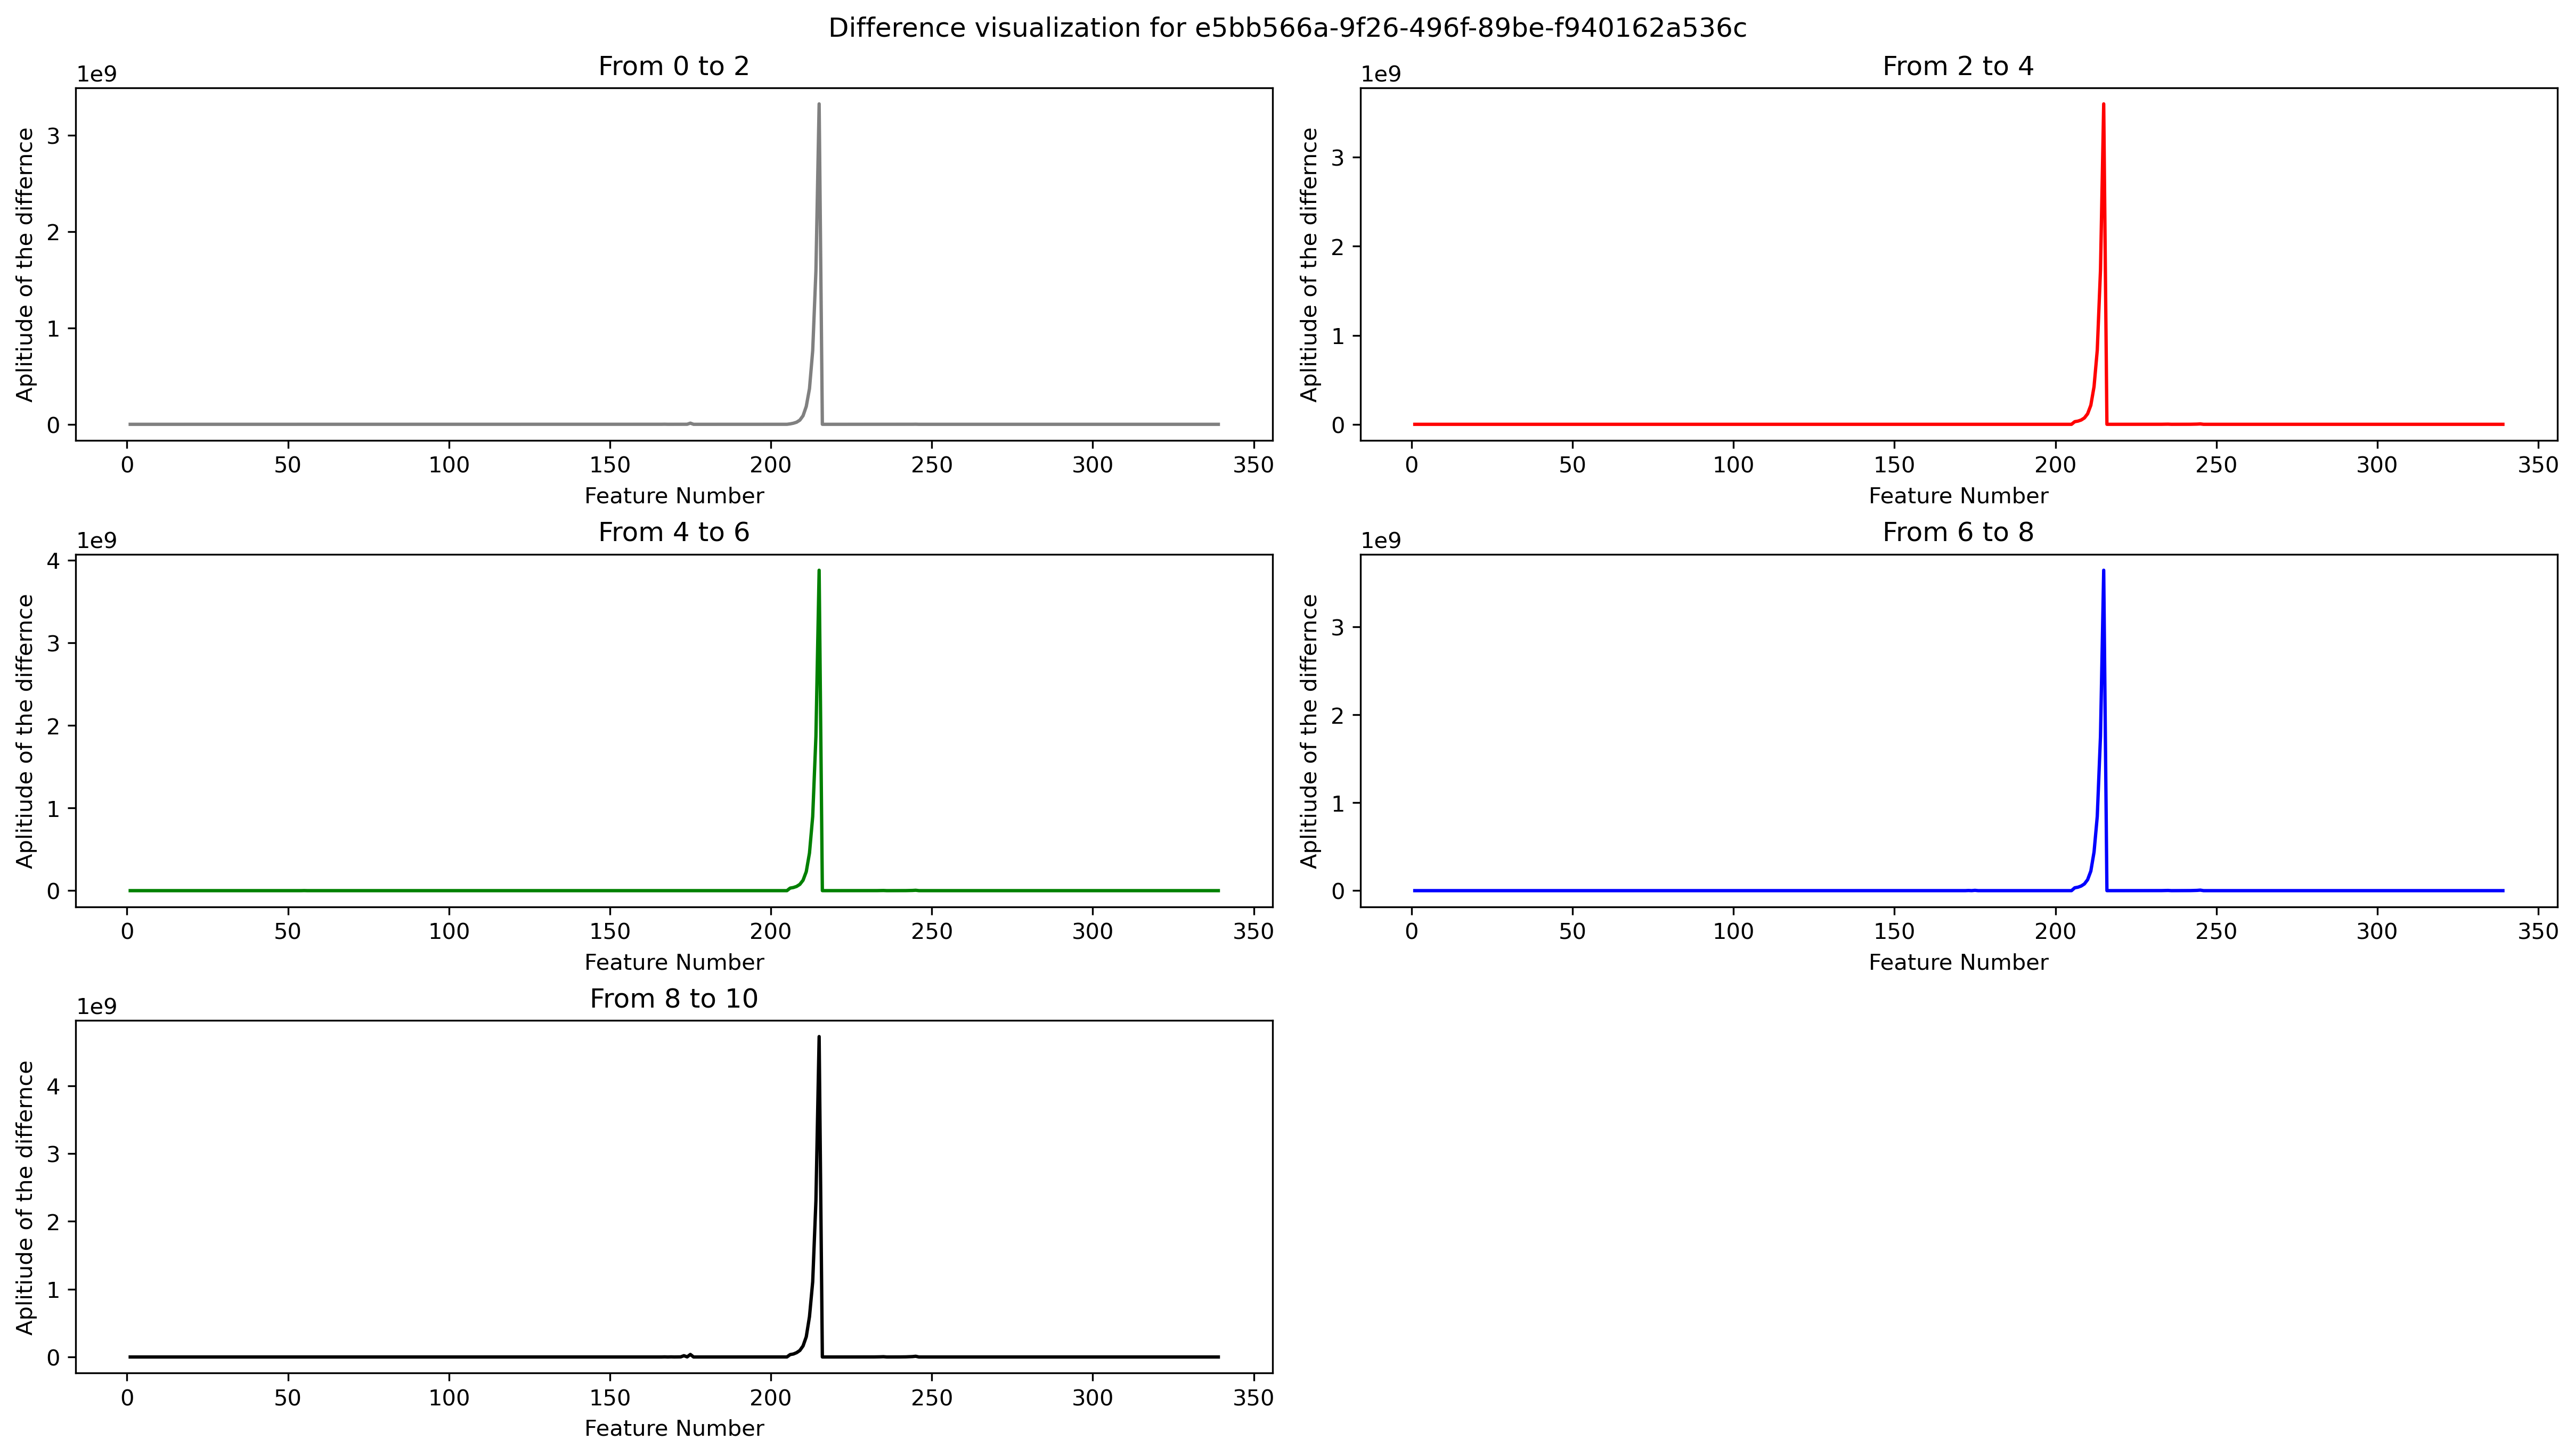

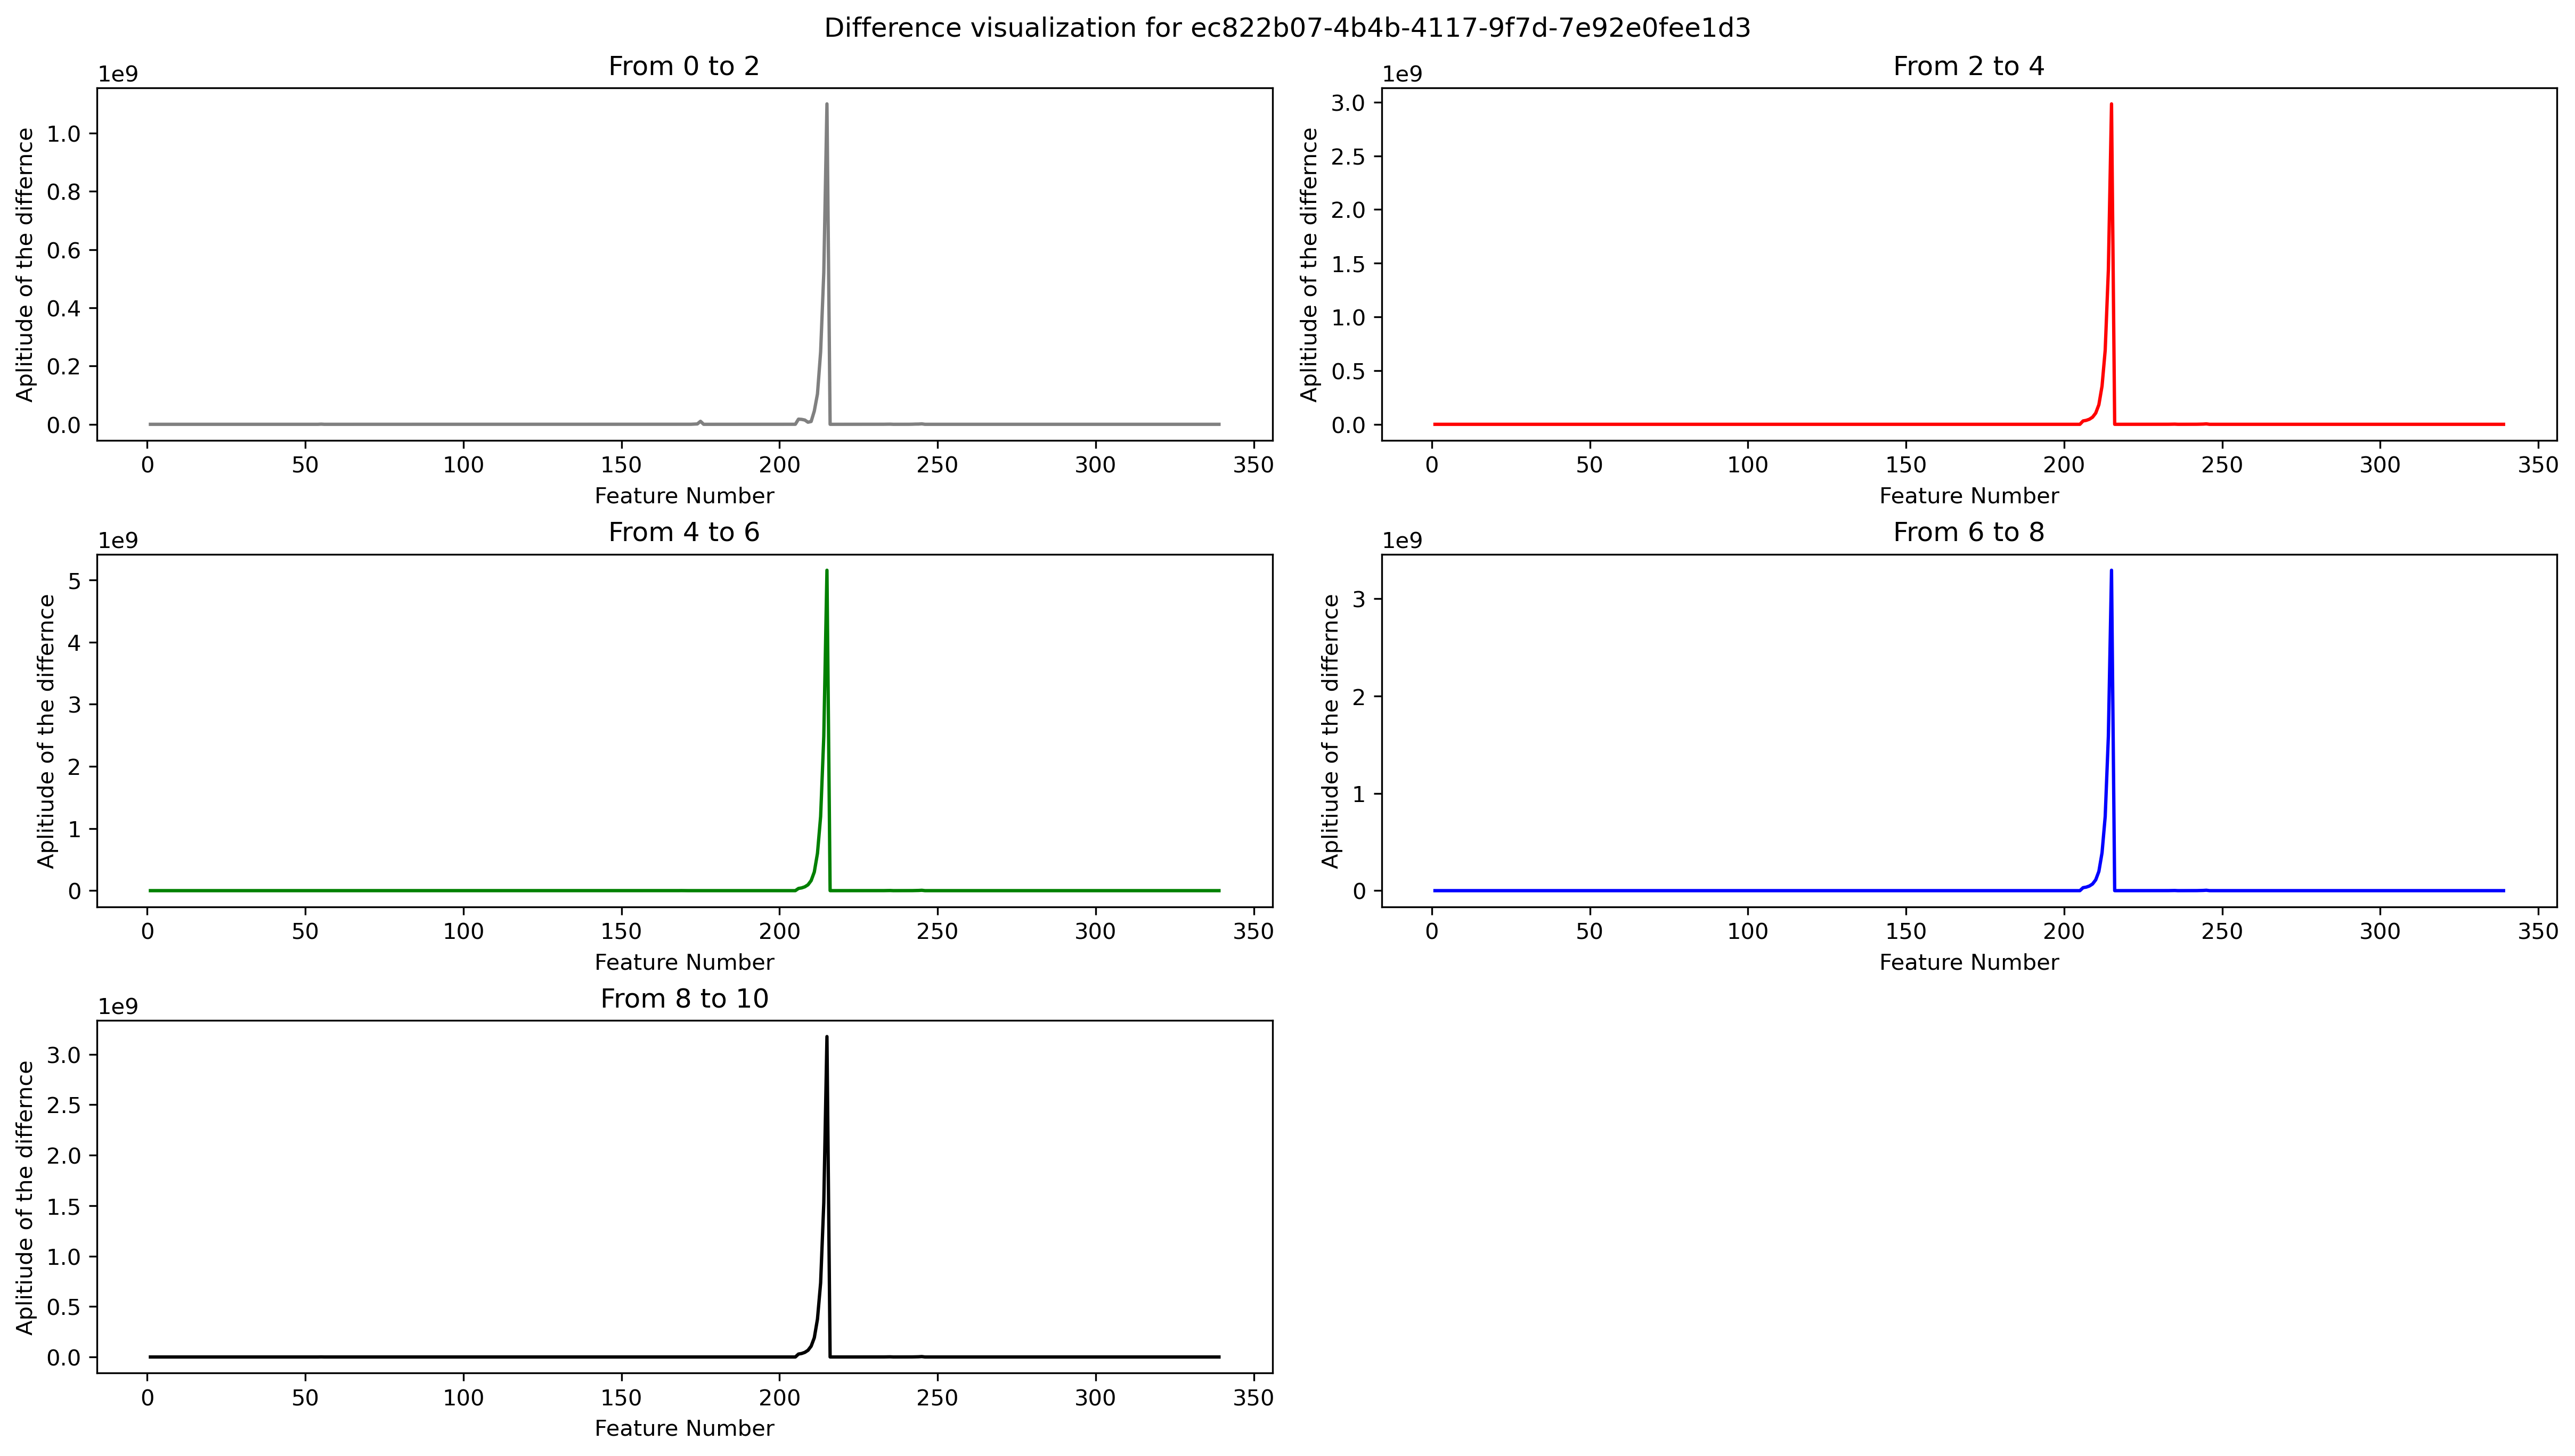

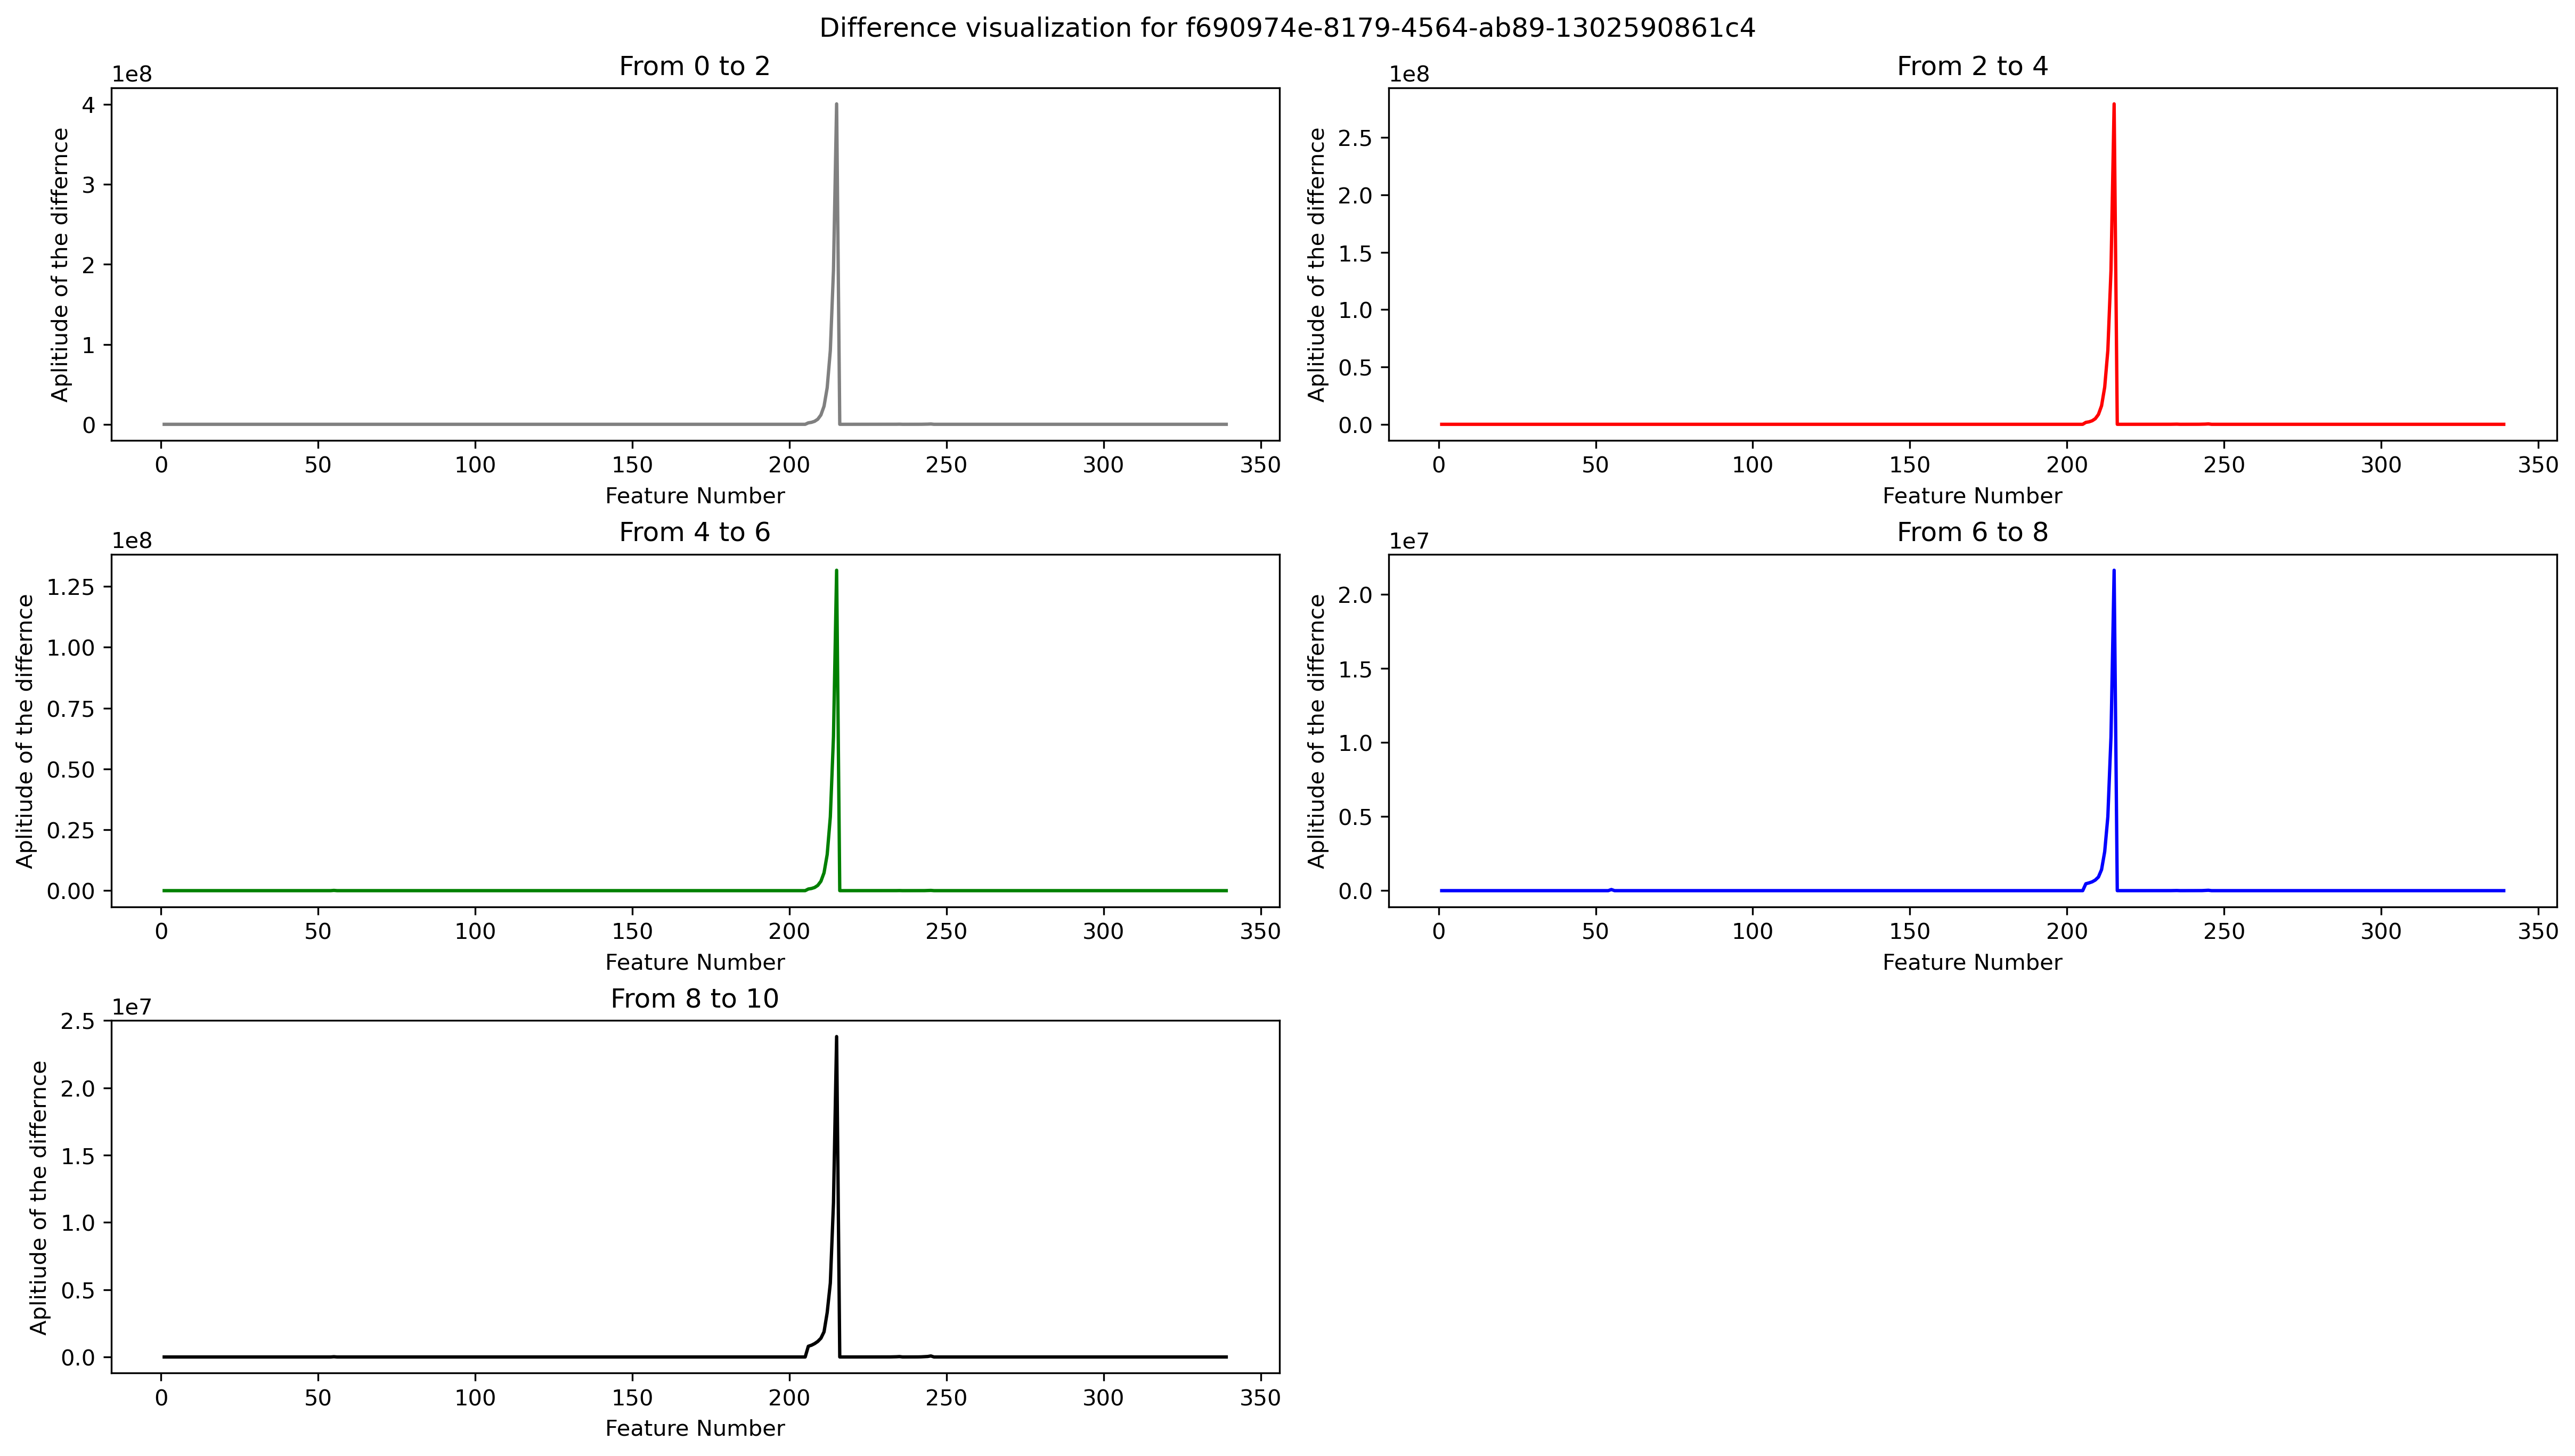

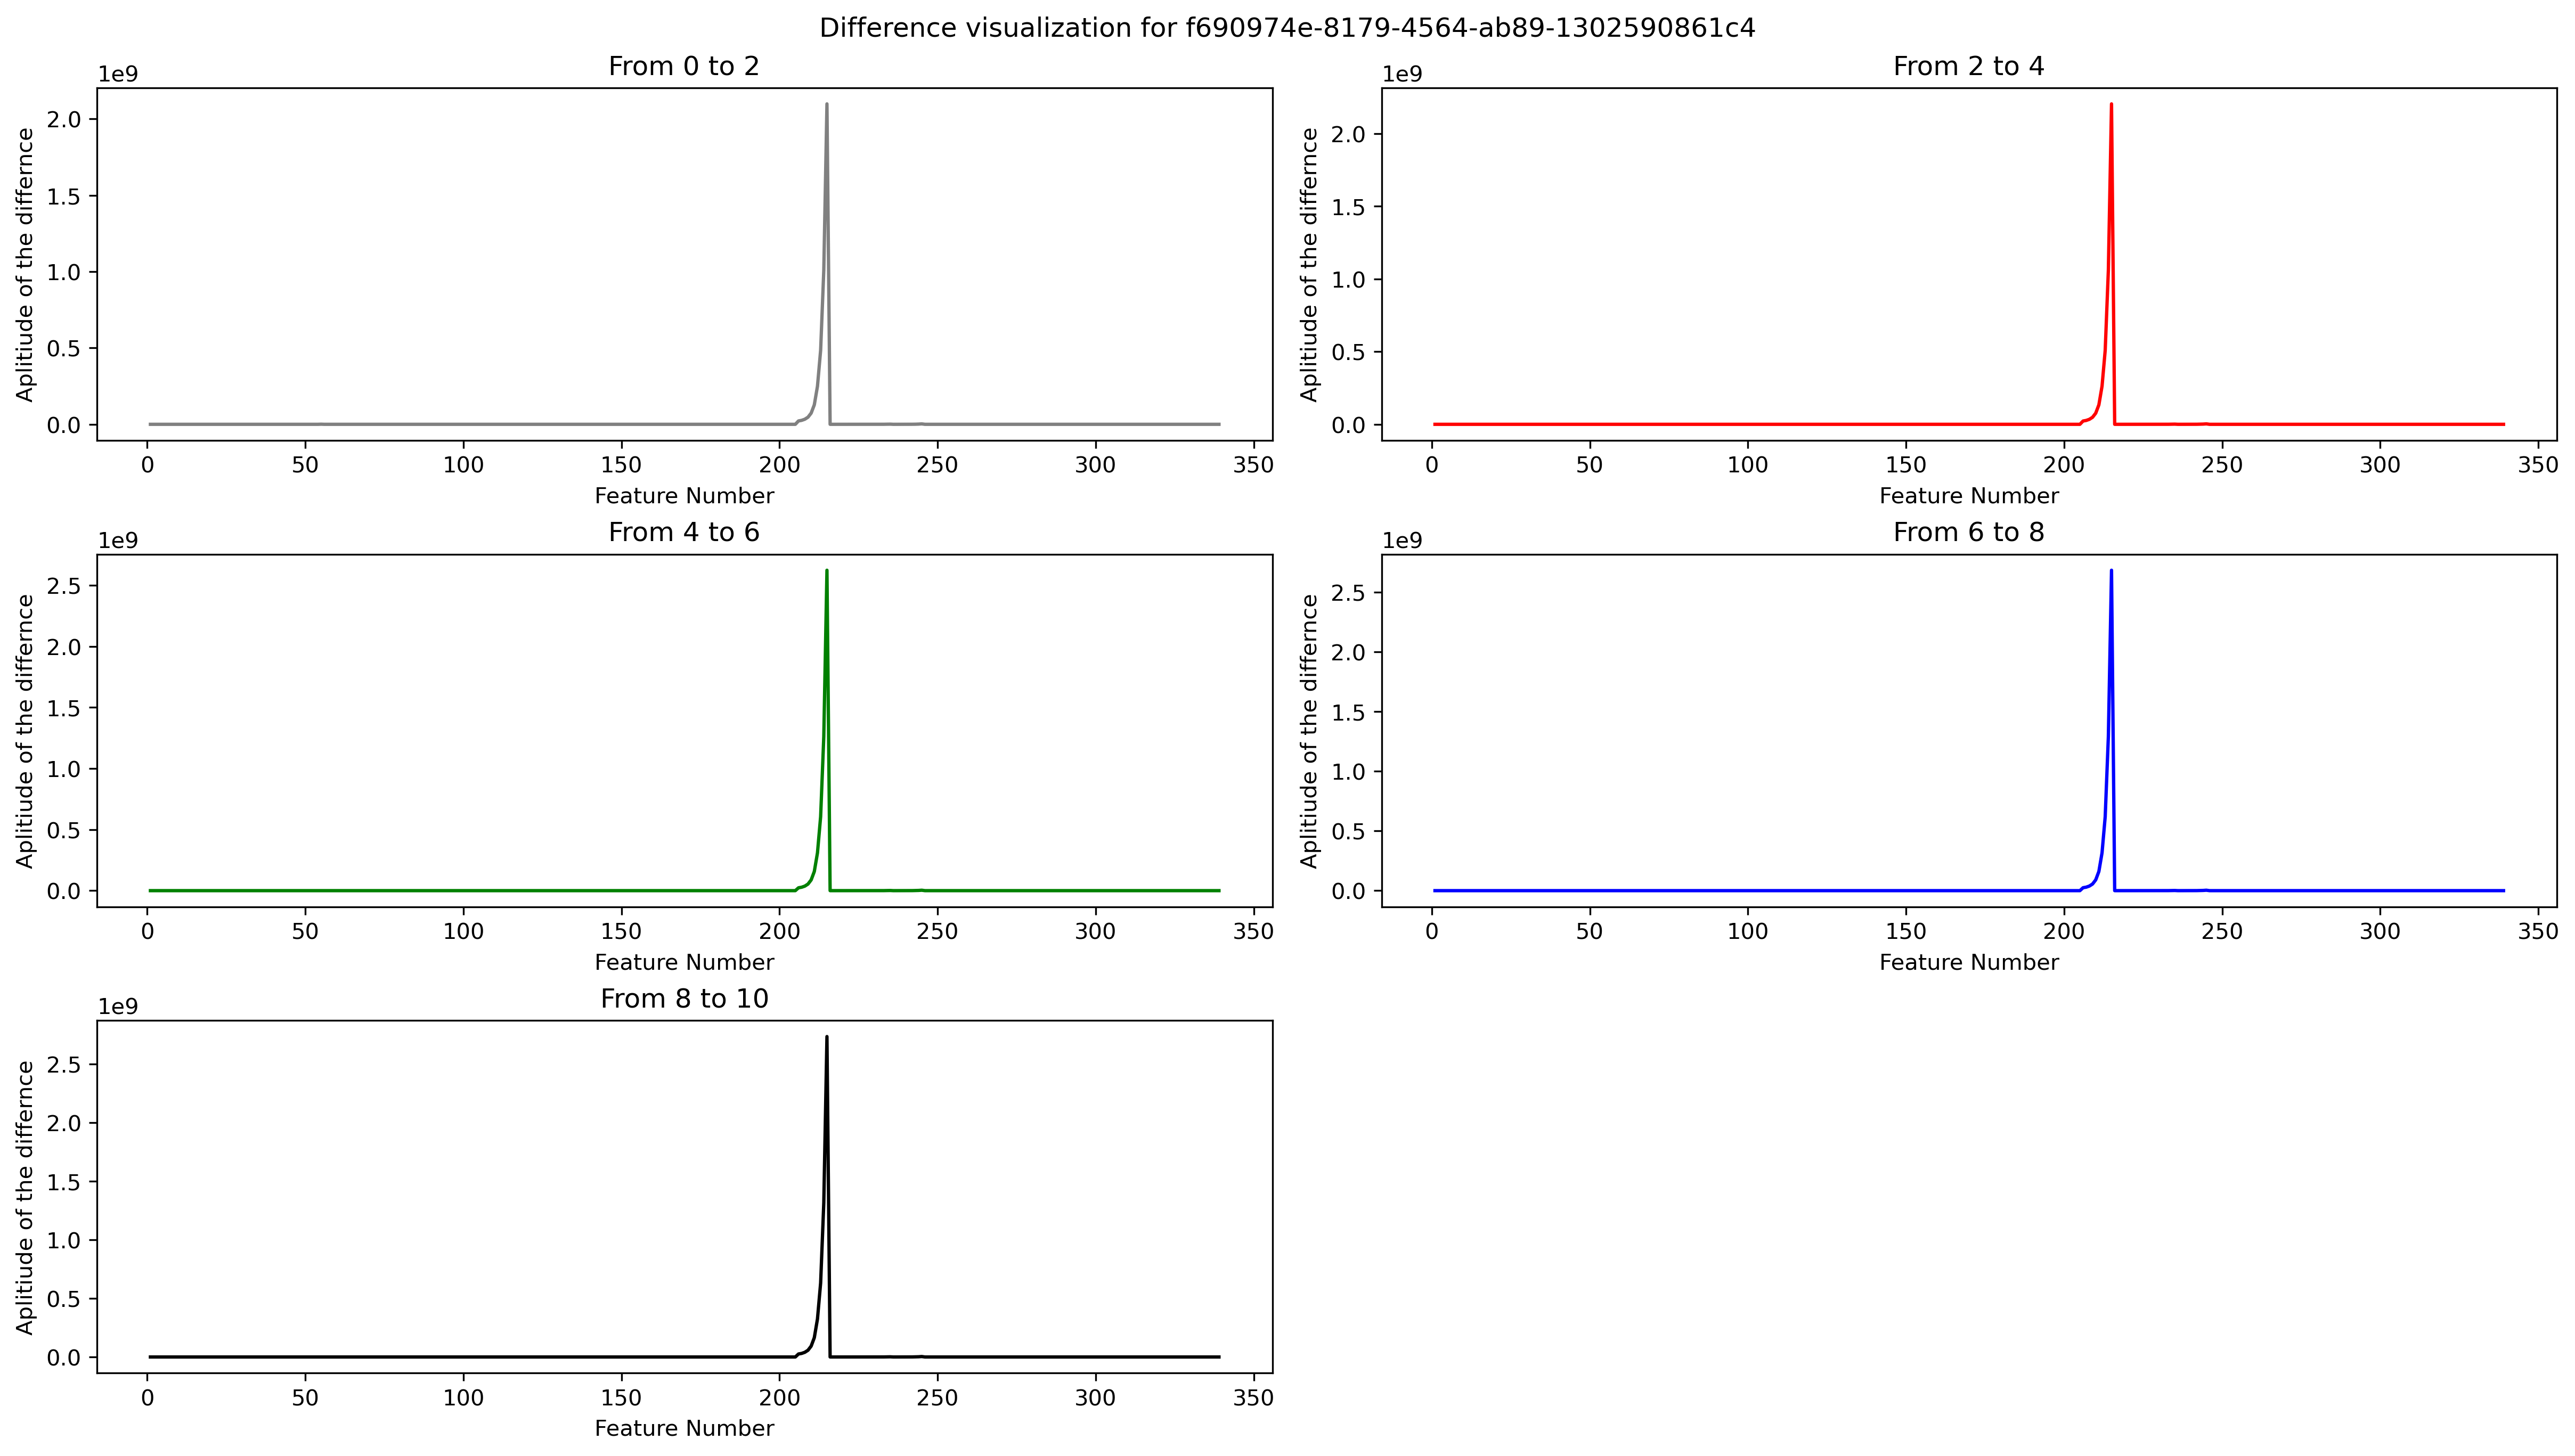

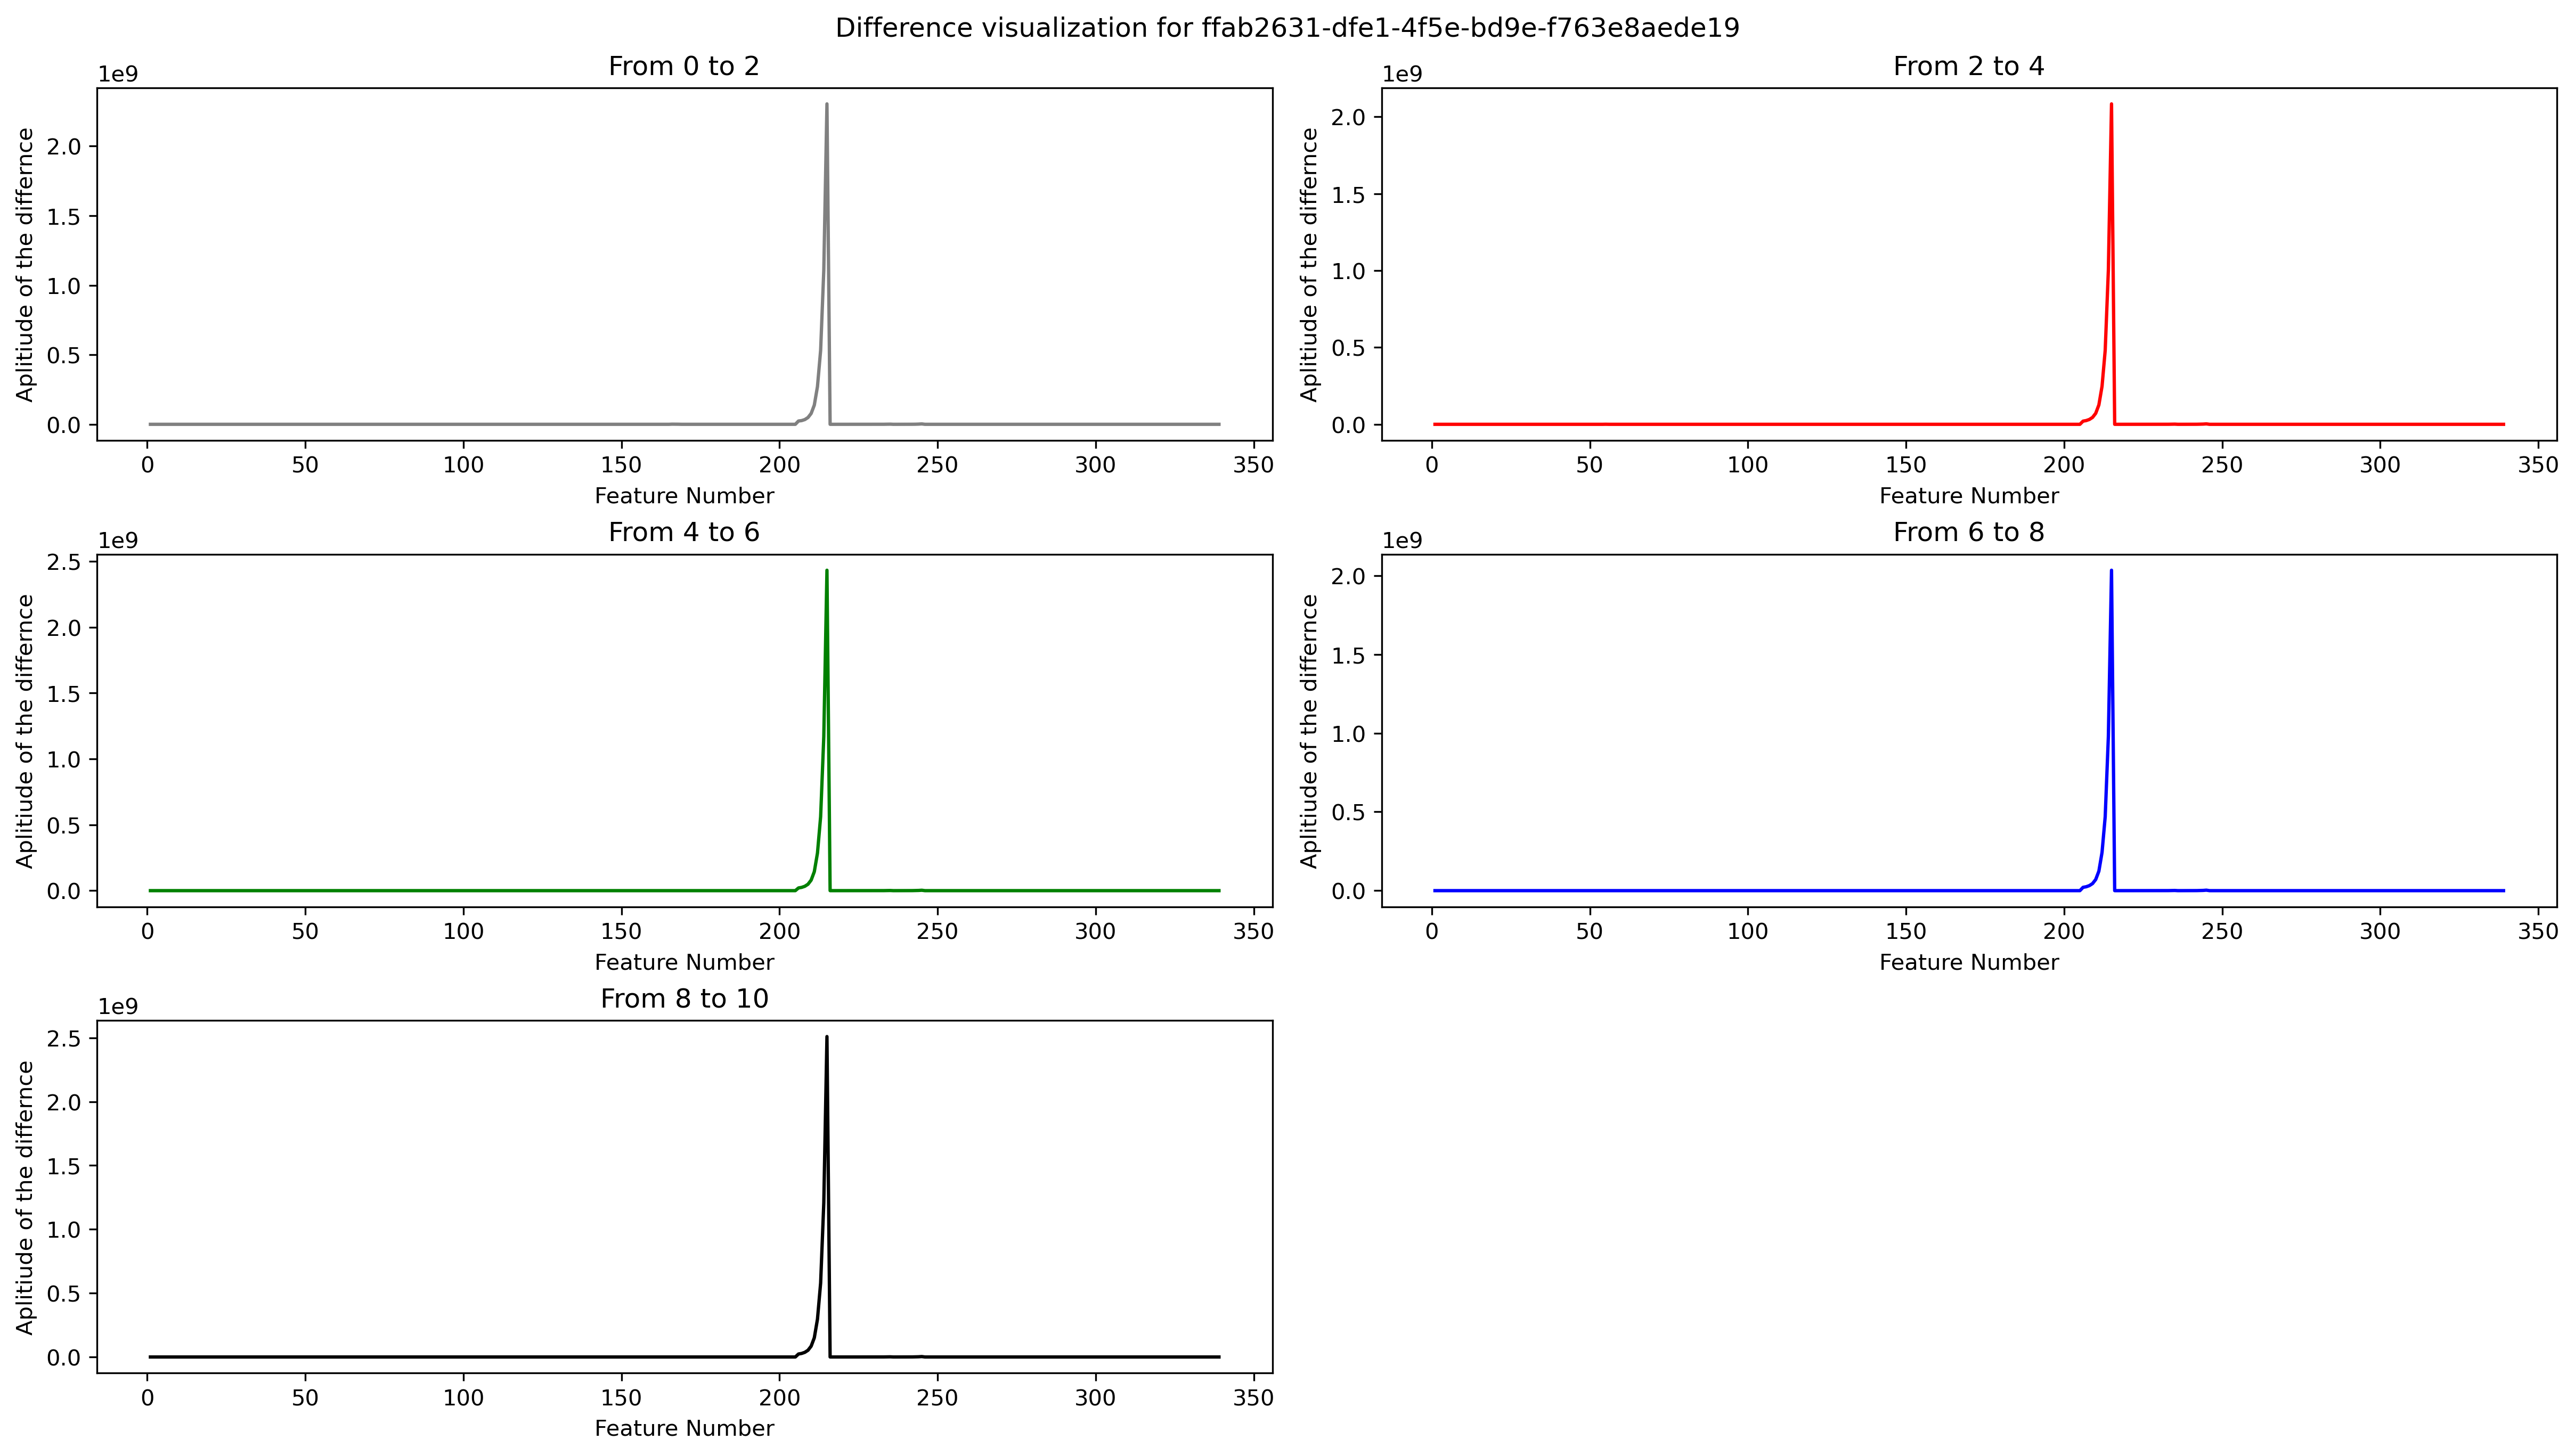

In [92]:
def coniditon(x): return (x > 0.1)

# Find the intersection between the lists
intersec_list = None
output = []
for index,row in difference_result.iterrows():
    visualize_data(row)
    output.append([idx for idx, element in enumerate(row['s_f_1']) if coniditon(element)])

# Find the intersection of the lists
intersec_list = set.intersection(*map(set,output))

print(f"The intersection of all lists has {len(intersec_list)} elements")
print(intersec_list)

We came from 339 feature to the 149 features. By chanining the condition we will come up with different list of features. This is pretty experimental. I am going to start to work in PCA based on the list of the features.


In [93]:
def pca_analysis(data, title, r_components=False, n_components=3):
    """
    Get the input data and analyise it based on PCA. If the `return_components` flage
    set to be False then the function will do a complete analysis and return the results
    as bar charts for decision making. If the `number_of_target_components` is false, 
    then the function calculate the components numbers based on the 
    `number_of_target_components` argument and return the results as pandas DataFrame
    
    :param data: Data to be analyized
    :type data: np.ndarray
    :param title: Title that going to be presented in the plots
    :type title: str
    :param return_components: A falg check if we are doing the analysis or returning
                              the components for furthuer process.
    :type return_components: bool
    :param number_of_target_components: Number of the target components to export
    :type number_of_target_components: int
    :return: Return the result as Pandas Data Frame.
    :rtype: pd.DataFrame
    """
    
    # Import the libraries we need for this function to work properly
    from sklearn import preprocessing
    from sklearn.decomposition import PCA
    import numpy as np
    # Import pandas to have access to the Dataframe
    from pandas import DataFrame
    
    # Make sure the data is in the form of numpy array.
    x_train = np.array(data)
    
    # define a scaler based on the `StandardScaler` which is centering the data and
    # fit the data to the Scaler.
    scaler = preprocessing.StandardScaler().fit(x_train)
    
    # Do the normalization
    scaled_data = np.array(scaler.transform(x_train))
    
    # Shuffled scaled data
    s_scaled_data = scaled_data
    
    if not r_components:
        # Do the analysis and display the results as bar chart
        n_features = len(data[0, :])
        n_samples = len(data)
        
        n_components = min(n_features, n_samples)
        
        # Create a PCA instance based on the number of features
        pca = PCA(n_components=n_components)
        
        # Get the Principal Components
        p_components = pca.fit_transform(scaled_data)
        
        # Plot the explained variances
        features = range(pca.n_components_)
        
        # Import matplot to draw the bar chart
        import matplotlib.pyplot as plt
        
        # We are going to find the number of correct components based on on two
        # approaches. The first approach is to limiting the number of components
        # to capture 90% of total variance. Second based on the shuffled spectrum.
        
        def capture_sum(c_ratio):
            acc_sum = 0
            i = 0
            for item in c_ratio:
                acc_sum += item
                i += 1
                if acc_sum >= 0.9:
                    break
            return i, acc_sum
        
        i, acc_sum = capture_sum(pca.explained_variance_ratio_)
            
        print(f"Target coverage is {acc_sum * 100} and happens when we apply {i} number of componenets.")                
        
                
        # Shuffle Spectrum
        # Get the shape of the transposed data
        s_scaled_data = scaled_data
        
        _, n_rows = s_scaled_data.shape
        
        
        for i in range(n_rows):
            s_scaled_data[:, i] = np.random.permutation(s_scaled_data[:, i])
    
        s_pca = PCA(n_components=n_components)
        sp_components = s_pca.fit_transform(s_scaled_data)
        
        fig, axes = plt.subplots(1, 1,figsize=(16, 9), dpi=300)
        
        axes.bar(features, pca.explained_variance_ratio_, color='blue')
        axes.set_title(f"Variance Ration of PCA components after shuffle spectrum for {title}")
        axes.set_xlabel('PCA features')
        axes.set_ylabel('Variance %')
        axes.set_xticks(features)
        axes.locator_params(axis='x', nbins=25)
        axes.plot(features, s_pca.explained_variance_ratio_, color='red', lw=0.5)
        
        # Draw the scatter plot based on the first two Principal Components
        pca = PCA(n_components=2)
        
        # Get the Principal Components
        p_components = pca.fit_transform(scaled_data)
        
        p_components = pd.DataFrame(p_components)
        
        fig, axes = plt.subplots(1, 1,figsize=(16, 9), dpi=300)
        
        axes.scatter(p_components[0], p_components[1], alpha=.1, color='black')
        axes.set_xlabel('PCA 1')
        axes.set_ylabel('PCA 2')
        axes.set_title(f"PCA scatter plot for the two first priciple comonents for {title}")
        
        # Draw the 3-D scatter Plot
        
        from mpl_toolkits.mplot3d.axes3d import Axes3D
        
        fig = plt.figure(figsize=(16,9), dpi=300)
        
        pca = PCA(n_components=3)
        
        # Get the Principal Components
        p_components = pca.fit_transform(scaled_data)
        
        p_components = pd.DataFrame(p_components)

        # Find the 3d Scatter
        ax = fig.add_subplot(1, 1, 1, projection='3d')
        ax.scatter(p_components[0], p_components[1], p_components[2],alpha=.1, color='black')
        ax.set_title(f"PCA 3D scatter plot for the thee first priciple comonents for {title}")
        ax.set_xlabel('PCA 1 - x axies')
        ax.set_ylabel('PCA 2 - y axies')
        ax.set_zlabel('PCA 3 - z axies')
        # Return nothing since the objective is to analyse the data
        return None
    else:
        
        pca = PCA(n_components=n_components)
        p_components = pca.fit_transform(scaled_data)
        
        
        # Return the result of the PCA based on the number of components
        return DataFrame(p_components)
def pca_analysis_selected_features(data, title, selected_features=[], r_components=False, n_components=3):
    """
    Get the input data and analyise it based on PCA. If the `return_components` flage
    set to be False then the function will do a complete analysis and return the results
    as bar charts for decision making. If the `number_of_target_components` is false, 
    then the function calculate the components numbers based on the 
    `number_of_target_components` argument and return the results as pandas DataFrame
    
    :param data: Data to be analyized
    :type data: np.ndarray
    :param title: Title that going to be presented in the plots
    :type title: str
    :param return_components: A falg check if we are doing the analysis or returning
                              the components for furthuer process.
    :type return_components: bool
    :param number_of_target_components: Number of the target components to export
    :type number_of_target_components: int
    :return: Return the result as Pandas Data Frame.
    :rtype: pd.DataFrame
    """
    
    # Import the libraries we need for this function to work properly
    from sklearn import preprocessing
    from sklearn.decomposition import PCA
    import numpy as np
    # Import pandas to have access to the Dataframe
    from pandas import DataFrame
    
    # Make sure the data is in the form of numpy array.
    if len(selected_features) > 0:
        x_train = np.array([data[i] for i in selected_features])
    else:
        x_train = np.array(data)
    
    # define a scaler based on the `StandardScaler` which is centering the data and
    # fit the data to the Scaler.
    scaler = preprocessing.StandardScaler().fit(x_train)
    
    # Do the normalization
    scaled_data = np.array(scaler.transform(x_train))
    
    # Shuffled scaled data
    s_scaled_data = scaled_data
    
    if not r_components:
        # Do the analysis and display the results as bar chart
        n_features = len(data[0, :])
        n_samples = len(data)
        
        n_components = min(n_features, n_samples)
        
        # Create a PCA instance based on the number of features
        pca = PCA(n_components=n_components)
        
        # Get the Principal Components
        p_components = pca.fit_transform(scaled_data)
        
        # Plot the explained variances
        features = range(pca.n_components_)
        
        # Import matplot to draw the bar chart
        import matplotlib.pyplot as plt
        
        # We are going to find the number of correct components based on on two
        # approaches. The first approach is to limiting the number of components
        # to capture 90% of total variance. Second based on the shuffled spectrum.
        
        def capture_sum(c_ratio):
            acc_sum = 0
            i = 0
            for item in c_ratio:
                acc_sum += item
                i += 1
                if acc_sum >= 0.9:
                    break
            return i, acc_sum
        
        i, acc_sum = capture_sum(pca.explained_variance_ratio_)
            
        print(f"Target coverage is {acc_sum * 100} and happens when we apply {i} number of componenets.")                
        
                
        # Shuffle Spectrum
        # Get the shape of the transposed data
        s_scaled_data = scaled_data
        
        _, n_rows = s_scaled_data.shape
        
        
        for i in range(n_rows):
            s_scaled_data[:, i] = np.random.permutation(s_scaled_data[:, i])
    
        s_pca = PCA(n_components=n_components)
        sp_components = s_pca.fit_transform(s_scaled_data)
        
        fig, axes = plt.subplots(1, 1,figsize=(16, 9), dpi=300)
        
        axes.bar(features, pca.explained_variance_ratio_, color='blue')
        axes.set_title(f"Variance Ration of PCA components after shuffle spectrum for {title}")
        axes.set_xlabel('PCA features')
        axes.set_ylabel('Variance %')
        axes.set_xticks(features)
        axes.locator_params(axis='x', nbins=25)
        axes.plot(features, s_pca.explained_variance_ratio_, color='red', lw=0.5)
        
        # Draw the scatter plot based on the first two Principal Components
        pca = PCA(n_components=2)
        
        # Get the Principal Components
        p_components = pca.fit_transform(scaled_data)
        
        p_components = pd.DataFrame(p_components)
        
        fig, axes = plt.subplots(1, 1,figsize=(16, 9), dpi=300)
        
        axes.scatter(p_components[0], p_components[1], alpha=.1, color='black')
        axes.set_xlabel('PCA 1')
        axes.set_ylabel('PCA 2')
        axes.set_title(f"PCA scatter plot for the two first priciple comonents for {title}")
        
        # Draw the 3-D scatter Plot
        
        from mpl_toolkits.mplot3d.axes3d import Axes3D
        
        fig = plt.figure(figsize=(16,9), dpi=300)
        
        pca = PCA(n_components=3)
        
        # Get the Principal Components
        p_components = pca.fit_transform(scaled_data)
        
        p_components = pd.DataFrame(p_components)

        # Find the 3d Scatter
        ax = fig.add_subplot(1, 1, 1, projection='3d')
        ax.scatter(p_components[0], p_components[1], p_components[2],alpha=.1, color='black')
        ax.set_title(f"PCA 3D scatter plot for the thee first priciple comonents for {title}")
        ax.set_xlabel('PCA 1 - x axies')
        ax.set_ylabel('PCA 2 - y axies')
        ax.set_zlabel('PCA 3 - z axies')
        # Return nothing since the objective is to analyse the data
        return None
    else:
        
        pca = PCA(n_components=n_components)
        p_components = pca.fit_transform(scaled_data)
        
        
        # Return the result of the PCA based on the number of components
        return DataFrame(p_components)

In [ ]:
# Find the PCA analysis results based on the new feature set


# Difference in Differences

First is a `Diference in Differences` analysis which is a group base approach to check the status of the data for two target groups, `PWP` and `HC`. Second is going to be based on checking the differences for `PWP` group for each individual and see what makes difference between two groups of recorded data. For this purpose we need to prepare all the data we have from before and after the treatment and try to find the difference in differences using the regression of a related model.

In [108]:
# Create two list one for before treatment, one for after treatment based on the filtered information
def create_before_list_separator(data):
    """
    Convert the list to two lists, One for before and one for after the teatment
    
    :param data: Data to be separated
    :type data: pd.DataFrame
    :return: A tuple of two lists
    :rtype: (pd.DataFrame, pd.DataFrame)
    """
    before_list = []
    after_list = []
    temp_healthCode = None
    temp_row = None
    for index, row in data.iterrows():
        if temp_healthCode is None:
            temp_healthCode = row['healthCode']
            temp_row = row
            continue
        else:
            if temp_healthCode == row['healthCode']:
                if(row['medTimepoint'] == 1):
                    after_list.append(temp_row)
                    before_list.append(row)
                else:
                    # For Health Condition (HC) it is not important whcih audio file recorded first
                    before_list.append(temp_row)
                    after_list.append(row)
                temp_row = None
                temp_healthCode = None
                continue
            else:
                if(temp_row['medTimepoint'] == 1 or temp_row['medTimepoint']==0):
                    before_list.append(temp_row)
                else:
                    # For Health Condition (HC) it is not important whcih audio file recorded first
                    after_list.append(temp_row)
                
                # Update the temperorary data and loop again.
                temp_row = row
                temp_healthCode = row['healthCode']
                continue
    
    # Separate two lists
    # Convert the after records to data frame
    before_pd = pd.DataFrame(data=before_list, columns=['healthCode',
                                                     'audio_audio',
                                                     'medTimepoint',
                                                     'createdOn'])
    # Convert the before records to data frame
    after_pd = pd.DataFrame(data=after_list, columns=['healthCode',
                                                     'audio_audio',
                                                     'medTimepoint',
                                                     'createdOn'])
    # Return the results
    return before_pd, after_pd
    
    

Now we need to add labels to each of the seperated lists before feeding it to our regression model

In [111]:
before_pd0, after_pd0 = create_before_list_separator(hc_pd)
before_pd1, after_pd1 = create_before_list_separator(pwp_pd)

# Concatnate the DataFrames to create two lists
before_pd = pd.concat([before_pd0,before_pd1])
after_pd = pd.concat([after_pd0,after_pd1])

display(before_pd)

#TODO Concatenate two lists to have one unified list 

,healthCode,audio_audio,medTimepoint,createdOn
0,e518e2ad-5a48-41a7-8143-2997cb32b678,5836266,0,2015-06-22 23:35:05
16,e64e4bd3-0209-4f60-a6bf-8132239090bd,5638293,0,2015-07-28 17:31:07
395,e7f0d9ca-682d-4da8-95c6-3b8ffdca0a03,5594023,0,2015-05-10 21:36:12
398,e81d303a-9c3a-41d9-8fd5-4cd913d66f1a,5456093,0,2015-05-03 20:53:08
526,e8b3b9a4-a48e-4212-aad8-0ee8d9a4f911,5395427,0,2015-03-09 16:45:44
528,e8b3b9a4-a48e-4212-aad8-0ee8d9a4f911,5394035,0,2015-03-09 16:46:41
616,e8b3b9a4-a48e-4212-aad8-0ee8d9a4f911,5689854,0,2015-04-09 11:43:17
618,e8b3b9a4-a48e-4212-aad8-0ee8d9a4f911,5700059,0,2015-04-11 00:17:43
785,ea0252eb-1817-4335-9d07-346ecdc54a84,5709214,0,2015-03-12 13:01:09
908,ea4e9d07-246e-402b-9c13-dfdae3fb3736,5607433,0,2015-05-12 00:06:46


To have the regression model run properly we still need to add two more columns to these datasets. One for identifying before and after record and one for idetifiying the pwp and hc records. This will provide us with enough information to train our regression model.